In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df= pd.read_csv('Social_Network_Ads.csv',index_col="User ID")

In [30]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [31]:
df.shape

(400, 4)

In [32]:
df.drop('Gender',axis=1,inplace=True)

#Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

##X_train, X_test, y_train, y_test=train_test_split(df.drop('Purchased'),axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [34]:
X=df.drop('Purchased',axis=1)

In [35]:
y=df['Purchased']

In [36]:
X,y

(          Age  EstimatedSalary
 User ID                       
 15624510   19            19000
 15810944   35            20000
 15668575   26            43000
 15603246   27            57000
 15804002   19            76000
 ...       ...              ...
 15691863   46            41000
 15706071   51            23000
 15654296   50            20000
 15755018   36            33000
 15594041   49            36000
 
 [400 rows x 2 columns],
 User ID
 15624510    0
 15810944    0
 15668575    0
 15603246    0
 15804002    0
            ..
 15691863    1
 15706071    1
 15654296    1
 15755018    0
 15594041    1
 Name: Purchased, Length: 400, dtype: int64)

In [20]:
y

User ID
15624510    0
15810944    0
Name: Purchased, dtype: int64

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
X_train.shape

(280, 2)

In [39]:
X.shape

(400, 2)

In [41]:
X_test.shape

(120, 2)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

#fit the scaler to the train set , it will learn the paramater

scaler.fit(X_train)

StandardScaler()

In [44]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [46]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [56]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [57]:
X_test_scaled.mean()

Age               -0.068394
EstimatedSalary   -0.006231
dtype: float64

In [54]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [58]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


# Effect of Scaling

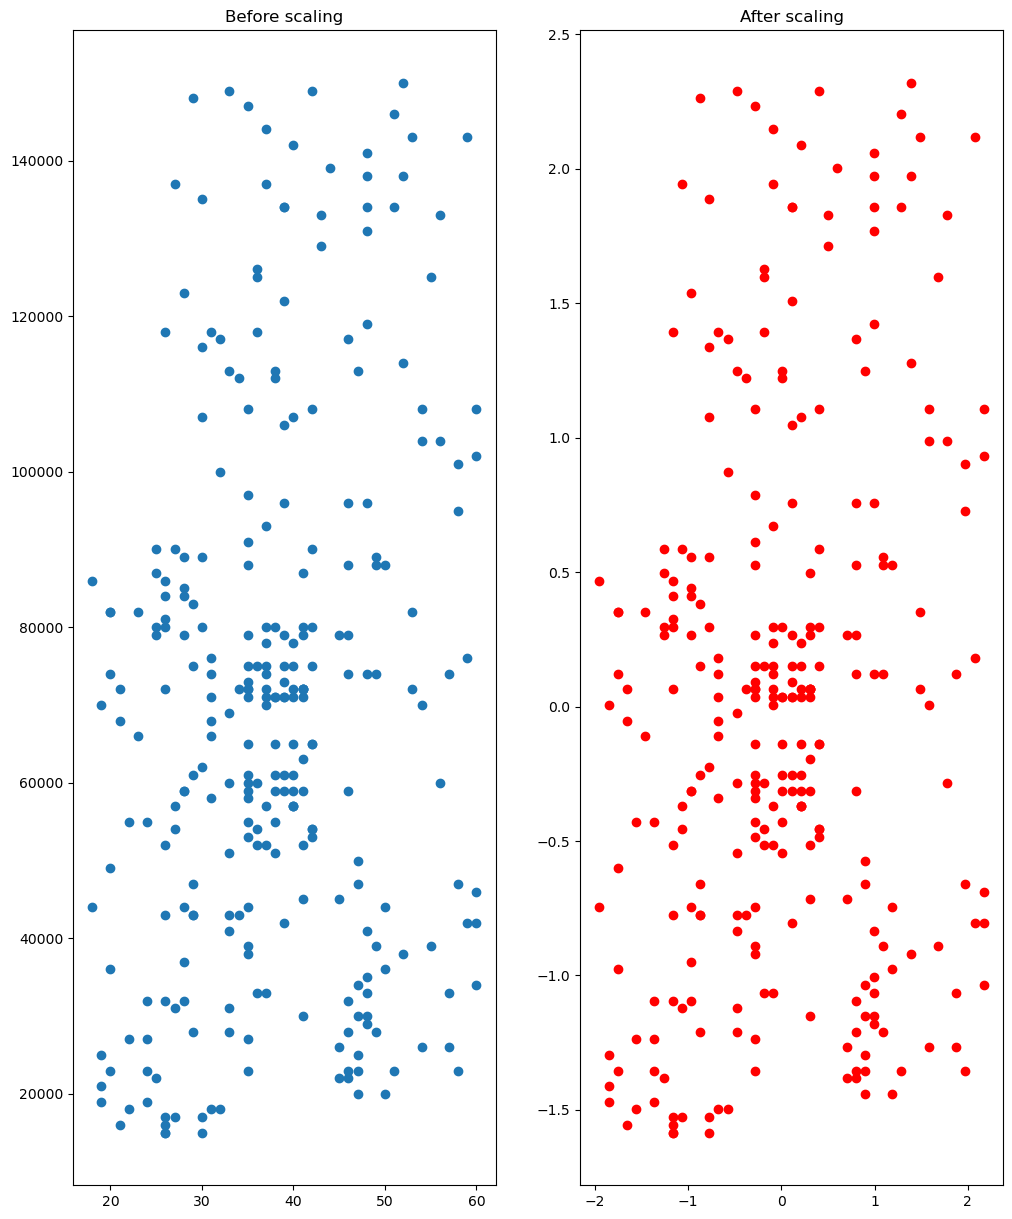

In [66]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,15))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scaling")
plt.show()

In [67]:
#Data is same , but the data is focussed on center

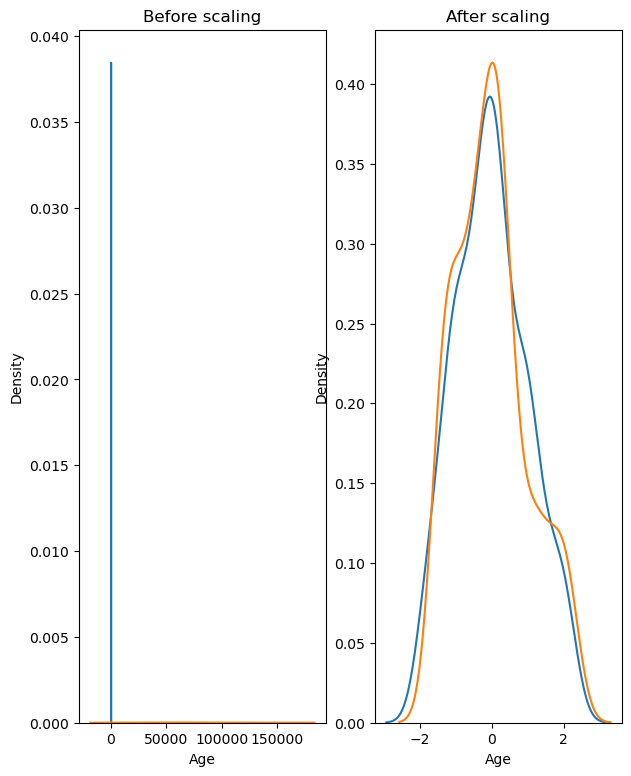

In [70]:
 fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(7,9))


ax1.set_title("Before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr=LogisticRegression()

In [73]:
lr_scaled=LogisticRegression()

In [75]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)


LogisticRegression()

In [76]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
print("Actual",accuracy_score(y_test,y_pred))
print("Actual",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Actual 0.8666666666666667


# No effect on outliers

In [80]:
df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],"Purchased":[0,1,1]}))

C:\Users\MODASUD\AppData\Local\Temp\ipykernel_14320\2671202972.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],"Purchased":[0,1,1]}))


In [82]:
df.shape

(403, 3)